# Finding the proper drug for a new patient using Decision Tree Classification
> We will use the Decision Tree classification algorithm to build a model from the historical data of patients, and their response to different medications. Then we'll use the trained decision tree to predict the class of an unknown patient or find a proper drug for a new patient.

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [decision trees, classification]

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Y.  
Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.

In this blog post, we will use the Decision Tree classification algorithm to build a model from the historical data of patients, and their response to different medications. Then we'll use the trained decision tree to predict the class of an unknown patient or find a proper drug for a new patient.

In [0]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [7]:
# read the data into a pandas dataframe
df = pd.read_csv('drug200.csv', delimiter=',')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
# dimensions of the data
df.shape

(200, 6)

---
### Preprocessing
Declare the following variables:
- X as the **feature matrix** (data of df)
- y as the **response vector** (target)

In [9]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Some features in this dataset are categorical, such as Sex and BP. Unfortunately, sklearn Decsion Trees do not handle categorical variables. So convert these features to numerical values. **pandas.get_dummies()** converts categorical variables into dummy/indicator variables.

In [10]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now, fill the target variable.

In [11]:
y = df['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

---
## The Decision Tree

### Train/Test Split

In [14]:
from sklearn.model_selection import train_test_split
# train 70% of the data
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# dimensions of the sets
print('The shape of the train set predictors', X_trainset.shape)
print('The shape of the train set target', y_trainset.shape)
print('The shape of the test set predictors', X_testset.shape)
print('The shape of the test set target', y_testset.shape)

The shape of the train set predictors (140, 5)
The shape of the train set target (140,)
The shape of the test set predictors (60, 5)
The shape of the test set target (60,)


---
### Modeling
First, we will create an instance of the **DecisionTreeClassifier** called **drugTree**. Inside of the classifier, specify *criterion='entropy'* so that we can see the information gain of each node.

In [15]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree # shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Fit the data with the training feature matrix **X_trainset** and the training response vector **y_trainset**

In [16]:
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

---
### Prediction
Let's make some predictions on the testing dataset and store it into a variable called **PredTree**.

In [0]:
predTree = drugTree.predict(X_testset)

Print out **predTree** and **y_testset** if you want to visually compare the prediction to the actual values.

In [18]:
print(predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


---
### Evaluation
Next, let's import **metrics** from sklearn and check the accuracy of our model.

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
print('DecisoinTree;s Accuracy: ', metrics.accuracy_score(y_testset, predTree))

DecisoinTree;s Accuracy:  0.9833333333333333


Our Decision Tree is very accurate.

**Accuracy classification score** computes subset accuracy, i.e. the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

---
### Visualization
Let's visualize the tree.

In [20]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


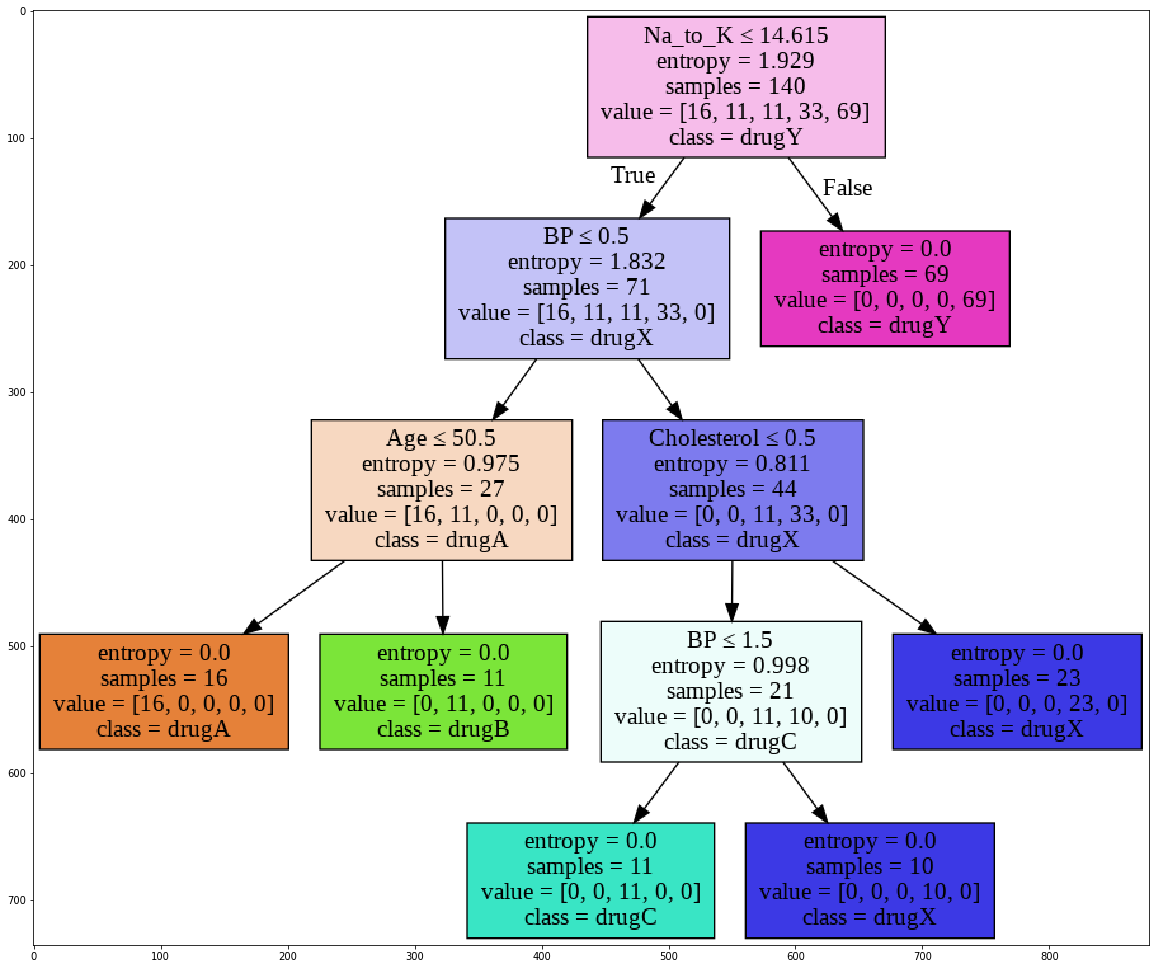

In [24]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 40))
plt.imshow(img,interpolation='nearest')